# Abstract 

The rise of remote work has introduced new dynamics in the work environment, offering flexibility and comfort but also posing significant challenges to employee mental health. This study explores the impact of remote work on mental health conditions such as depression, anxiety, and burnout. Using a dataset from various demographics, we analyzed factors including job satisfaction, work-life balance, stress levels, and mental health status among employees aged 20 to 60. Our findings reveal that remote workers are more prone to depression, while on-site employees experience higher rates of burnout. Gender differences also emerged, with males showing a higher incidence of depression and females more affected by burnout. Additionally, 76% of remote workers reported mental health conditions, with many expressing dissatisfaction or neutral feelings towards their work setup. Despite 68% of remote workers engaging in physical activity, mental health challenges persist, compounded by poor sleep quality and long working hours. These insights underscore the need for targeted interventions to support mental well-being in remote and hybrid work environments.

# Overview
Remote work has been the ideal situation for many employees, offering a great flexibility and comfortability. However, in the long run, it can lead to mental health issues such as loneliness, depression, and anxiety. It is important to take steps to ensure employees have the support they need to maintain a healthy balance between their work and personal lives. In this study we will explore remote work and menatl health

## About the dataset
This dataset examines the impact of remote work on mental health, gathering responses from individuals across various demographics. It includes key metrics such as job satisfaction, anxiety levels, and work-life balance. Here is the link for the dataste used in here (https://www.kaggle.com/datasets/waqi786/remote-work-and-mental-health) 

#### Columns:

* Employee_ID: Unique identifier for each employee.
* Age: Age of the employee.
* Gender: Gender of the employee.
* Job_Role: Current role of the employee.
* Industry: Industry they work in.
* Work_Location: Whether they work remotely, hybrid, or onsite.
* Stress_Level: Their self-reported level of stress.
* Mental_Health_Condition: Any mental health condition reported (Anxiety, Depression, etc.).
* Social_Isolation_Rating: A self-reported rating (1-5) on how isolated they feel.
* Satisfaction_with_Remote_Work: How satisfied they are with remote work arrangements (Satisfied, Neutral, Unsatisfied).

# Settings

In [1]:
# Python ≥3.9 is required
import sys
assert sys.version_info >= (3, 9)

# Scikit-Learn ≥1.0 is required
import sklearn
assert sklearn.__version__ >= "1.0"

# Common imports
import numpy as np
import pandas as pd
import os

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn import metrics


# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Precision options
np.set_printoptions(precision=2)
pd.options.display.float_format = '{:.3f}'.format

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [2]:
remote_data = pd.read_csv(r'C:\Users\nuhaa\OneDrive\Desktop\remote-work-and-mental-health\Impact_of_Remote_Work_on_Mental_Health.csv')
remote_data

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,None,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,None,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,None,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,EMP4996,32,Male,Sales,Consulting,4,Onsite,24,2,5,High,Burnout,Yes,Decrease,4,Neutral,1,Weekly,Average,Asia
4996,EMP4997,39,Female,Sales,Healthcare,27,Onsite,48,15,1,Low,Depression,Yes,Decrease,1,Satisfied,1,None,Average,Africa
4997,EMP4998,42,Female,Sales,Healthcare,21,Hybrid,34,1,4,High,Burnout,No,Increase,3,Satisfied,1,Daily,Poor,Oceania
4998,EMP4999,27,Female,Sales,Healthcare,26,Remote,58,0,5,Low,None,Yes,Increase,3,Unsatisfied,4,Daily,Average,Asia


## Explor the Dataset

In [3]:
#  Print data information
print(remote_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Employee_ID                        5000 non-null   object
 1   Age                                5000 non-null   int64 
 2   Gender                             5000 non-null   object
 3   Job_Role                           5000 non-null   object
 4   Industry                           5000 non-null   object
 5   Years_of_Experience                5000 non-null   int64 
 6   Work_Location                      5000 non-null   object
 7   Hours_Worked_Per_Week              5000 non-null   int64 
 8   Number_of_Virtual_Meetings         5000 non-null   int64 
 9   Work_Life_Balance_Rating           5000 non-null   int64 
 10  Stress_Level                       5000 non-null   object
 11  Mental_Health_Condition            5000 non-null   object
 12  Access

In [4]:
print(remote_data.describe())

           Age  Years_of_Experience  Hours_Worked_Per_Week  \
count 5000.000             5000.000               5000.000   
mean    40.995               17.810                 39.615   
std     11.296               10.020                 11.860   
min     22.000                1.000                 20.000   
25%     31.000                9.000                 29.000   
50%     41.000               18.000                 40.000   
75%     51.000               26.000                 50.000   
max     60.000               35.000                 60.000   

       Number_of_Virtual_Meetings  Work_Life_Balance_Rating  \
count                    5000.000                  5000.000   
mean                        7.559                     2.984   
std                         4.636                     1.411   
min                         0.000                     1.000   
25%                         4.000                     2.000   
50%                         8.000                     3.000   


In [5]:
remote_data.isnull().sum()

Employee_ID                          0
Age                                  0
Gender                               0
Job_Role                             0
Industry                             0
Years_of_Experience                  0
Work_Location                        0
Hours_Worked_Per_Week                0
Number_of_Virtual_Meetings           0
Work_Life_Balance_Rating             0
Stress_Level                         0
Mental_Health_Condition              0
Access_to_Mental_Health_Resources    0
Productivity_Change                  0
Social_Isolation_Rating              0
Satisfaction_with_Remote_Work        0
Company_Support_for_Remote_Work      0
Physical_Activity                    0
Sleep_Quality                        0
Region                               0
dtype: int64

## Spilit the Dataset into Training Set and Test Set

In [44]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(remote_data, test_size=0.2, random_state=42)
train_set.shape, test_set.shape

((4000, 20), (1000, 20))

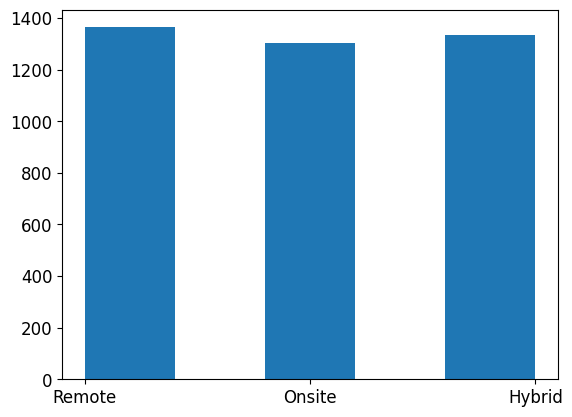

In [7]:
plt.hist(train_set['Work_Location'], bins=5)
plt.show()

## Numerical Features: Checkning for Outliers

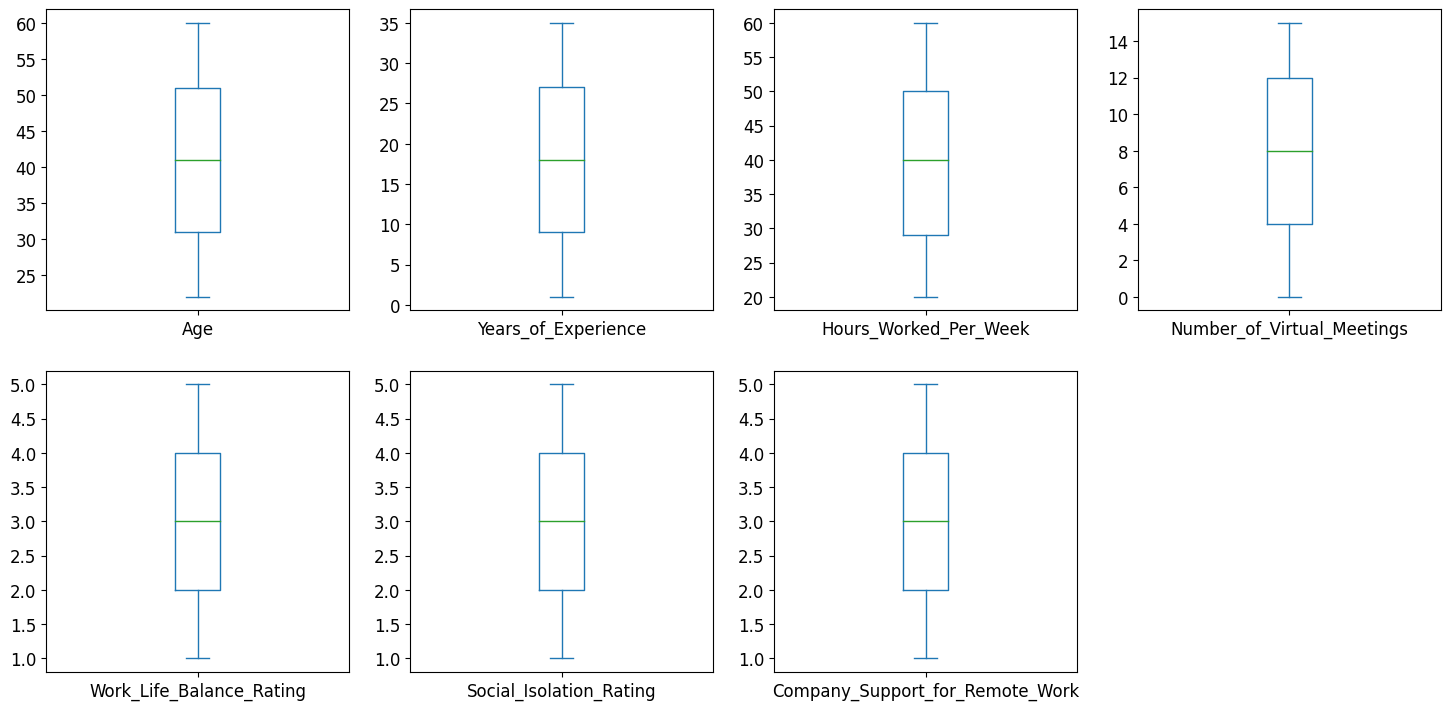

In [8]:
p = train_set[
    ['Age', 'Years_of_Experience', 'Hours_Worked_Per_Week', 'Number_of_Virtual_Meetings', 
     'Work_Life_Balance_Rating','Social_Isolation_Rating', 'Company_Support_for_Remote_Work',
    ]
].plot.box(subplots=True, layout=(4, 4), figsize=(18,18))

In [9]:
train_set['Mental_Health_Condition'].unique()

array(['Anxiety', 'Burnout', 'None', 'Depression'], dtype=object)

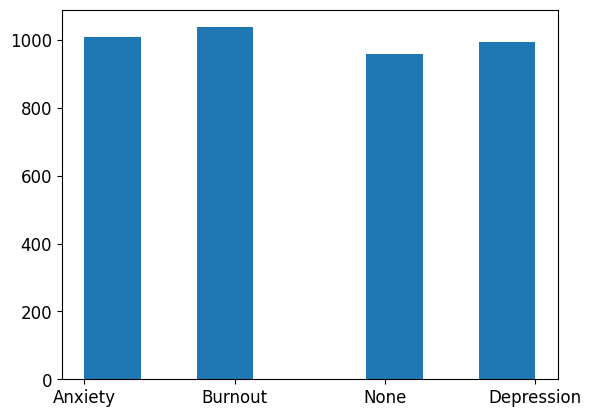

In [10]:
plt.hist(train_set['Mental_Health_Condition'], bins=8)
plt.show()

## Numerical Features: Checking for Missing Values

In [11]:
# Count missing values in the 'Mental_Health_Condition' column
missing_in_Mental = train_set.isna().sum()
print(f'Missing values in "Mental_Health_Condition ": {missing_in_Mental}')

Missing values in "Mental_Health_Condition ": Employee_ID                          0
Age                                  0
Gender                               0
Job_Role                             0
Industry                             0
Years_of_Experience                  0
Work_Location                        0
Hours_Worked_Per_Week                0
Number_of_Virtual_Meetings           0
Work_Life_Balance_Rating             0
Stress_Level                         0
Mental_Health_Condition              0
Access_to_Mental_Health_Resources    0
Productivity_Change                  0
Social_Isolation_Rating              0
Satisfaction_with_Remote_Work        0
Company_Support_for_Remote_Work      0
Physical_Activity                    0
Sleep_Quality                        0
Region                               0
dtype: int64


In [12]:
# Filling the missing values
#train_set['Mental_Health_Condition'].replace('None','No', inplace=True)
#train_set['Physical_Activity'].fillna(train_set['Physical_Activity'].mode()[0], inplace=True)

## Numerical features: looking for correlation

In [13]:
corr_matrix = train_set.corr(numeric_only=True)
#corr_matrix
corr_matrix

,Age,Years_of_Experience,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Social_Isolation_Rating,Company_Support_for_Remote_Work
Age,1.000,0.002,-0.009,-0.003,0.022,-0.017,0.017
Years_of_Experience,0.002,1.000,-0.018,0.009,0.005,0.001,0.018
Hours_Worked_Per_Week,-0.009,-0.018,1.000,0.002,-0.009,-0.005,0.014
Number_of_Virtual_Meetings,-0.003,0.009,0.002,1.000,0.007,0.004,0.003
Work_Life_Balance_Rating,0.022,0.005,-0.009,0.007,1.000,0.002,-0.007
Social_Isolation_Rating,-0.017,0.001,-0.005,0.004,0.002,1.000,0.014
Company_Support_for_Remote_Work,0.017,0.018,0.014,0.003,-0.007,0.014,1.000


### After initial examination we conclude that
  
* Our data contains int and Categorical datatypes no exist for float varaiabels. 
* Mental Health condition is the column  we focused on in this study
* We spilit the data into training set and test set in case we need to carry more processes in our data so all our exploratory and analysis iis on train set.
                                                                                     
* Column employee ID can be dropped since its not necessary for our study                                                                                         
* We have ['Anxiety', 'Burnout', 'None', 'Depression'] in our target variable (Mental Health condition), So our problem could be Multi-class classification.
* There is no redundant information in the dataset which means there is no muticolinearity in our dataframe.
* From the plots above and correlation heatmap, it seems that thare is no clear relatioship between between our columns.
* Mental health condition and physical activity columns have some missing values we assumed there are no mental health so it has been filled the fisrt with 'None' and the second with the mode value.
* No outliers in our data.

## Exploratory Data Analysis (EDA)

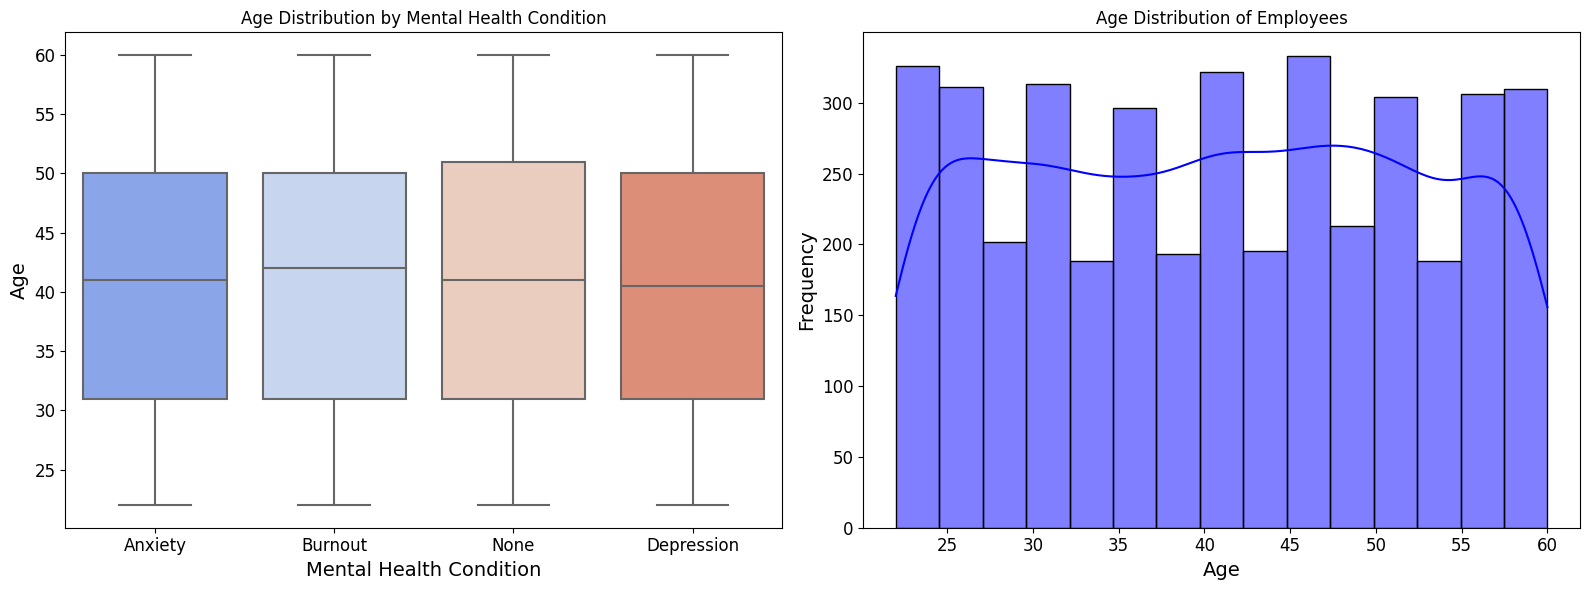

In [14]:
# Create age bins (adjusted for the right range)
train_set['age_group'] = pd.cut(train_set['Age'], bins=[20, 30, 40, 50, 60], labels=['20-30', '30-40', '40-50', '50-60'])

# Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# First Plot: Box Plot for Age Distribution by Mental Health Condition
sns.boxplot(x='Mental_Health_Condition', y='Age', data=train_set, palette='coolwarm', ax=axes[0])
axes[0].set_title('Age Distribution by Mental Health Condition')
axes[0].set_xlabel('Mental Health Condition')
axes[0].set_ylabel('Age')

# Second Plot: Histogram for Age Distribution
sns.histplot(train_set['Age'], bins=15, kde=True, color='Blue', ax=axes[1])
axes[1].set_title('Age Distribution of Employees')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Frequency')

# Ensure plots are displayed without overlap
plt.tight_layout()

# Show the plots
plt.show()

In [15]:
# Set default Seaborn style
sns.set_style("whitegrid")

# Function to create count plots with different hues
def plot_countplot(data, x_col, hue_col=None, title="", palette='coolwarm', ax=None):
    sns.countplot(x=x_col, hue=hue_col, data=data, palette=palette, ax=ax)
    plt.title(title)
    plt.xlabel(x_col)
    plt.ylabel('Count')

# Function to create pie charts
def plot_piechart(data, column, title="", colors=None, explode_factor=0.05, ax=None):
    value_counts = data[column].value_counts()
    explode = [explode_factor] * len(value_counts)  # Slightly explode all slices
    ax.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode, shadow=True)
    ax.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
    ax.set_title(title)


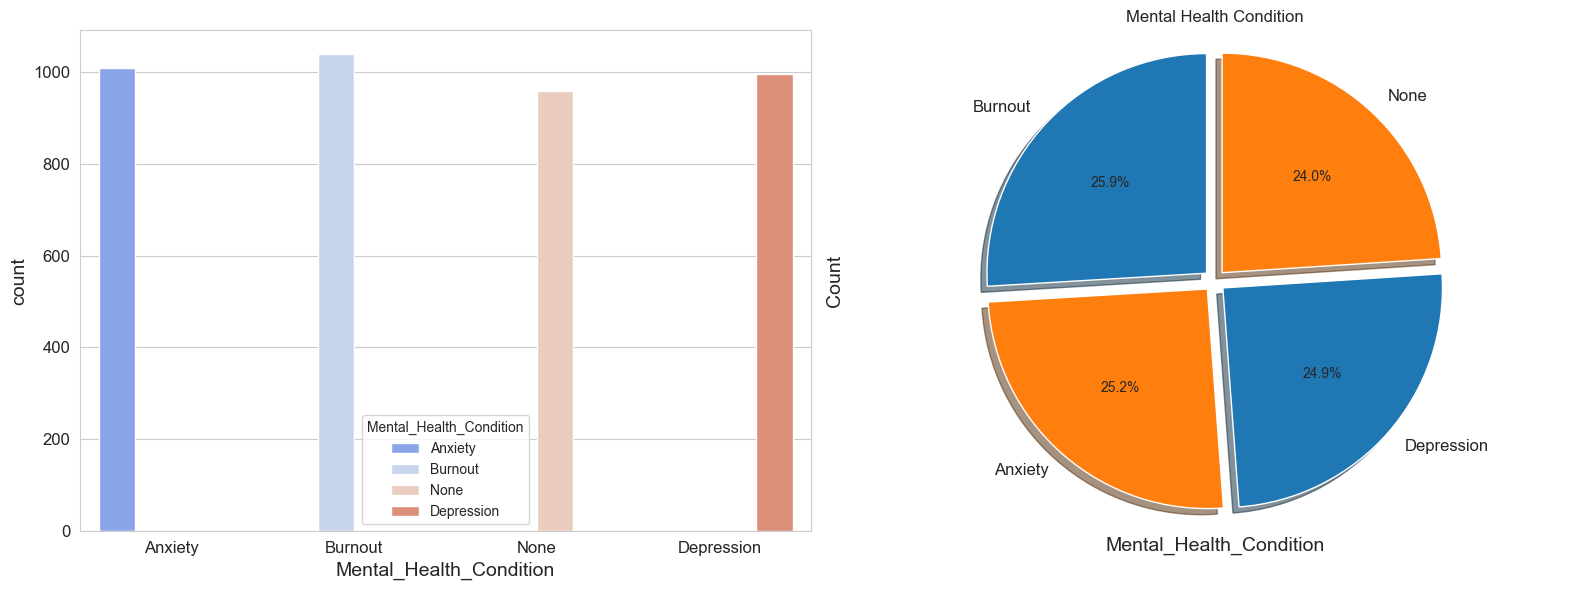

In [48]:
# Count plot and pie chart for Gender
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Count plot
plot_countplot(train_set, x_col='Mental_Health_Condition', hue_col='Mental_Health_Condition', title='Mental Health by Work Location', ax=axes[0])

plot_piechart(train_set, column='Mental_Health_Condition', title='Mental Health Condition', colors=['#1f77b4', '#ff7f0e'], ax=axes[1])
plt.tight_layout()
plt.show()

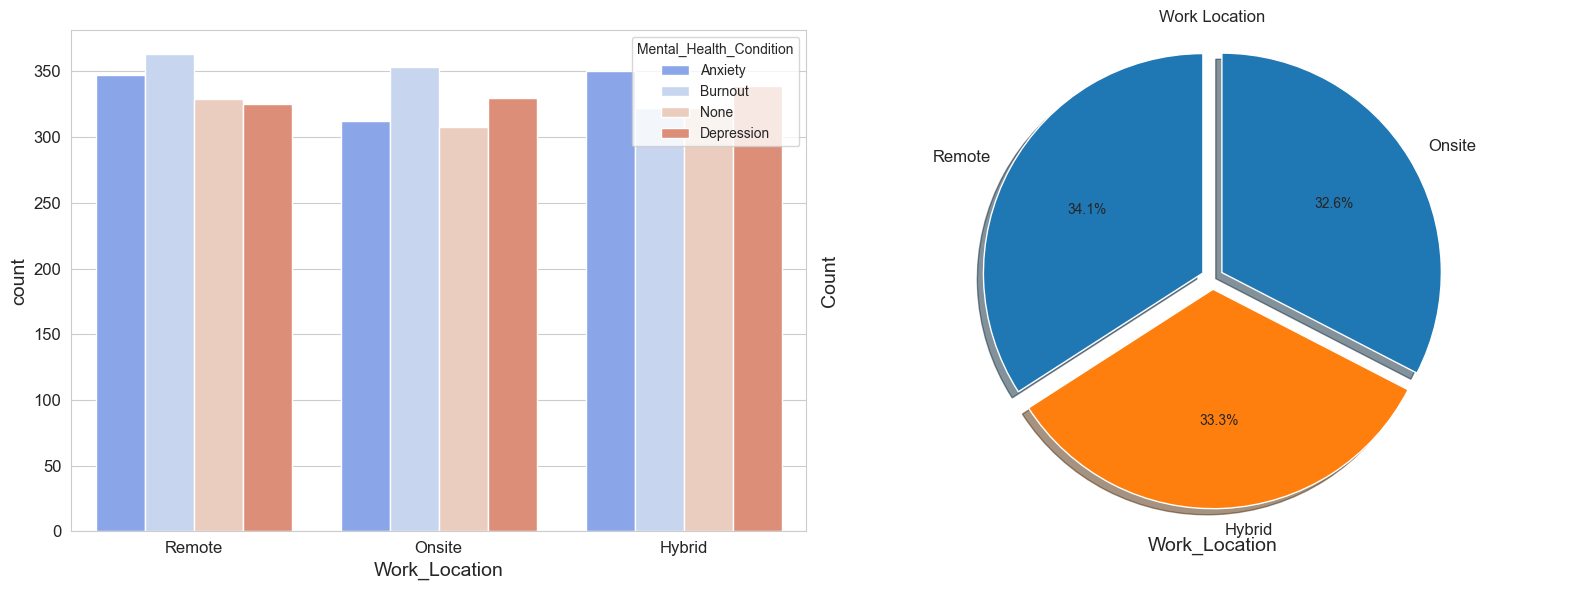

In [16]:
# Count plot and pie chart for Gender
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Count plot
plot_countplot(train_set, x_col='Work_Location', hue_col='Mental_Health_Condition', title='Mental Health by Work Location', ax=axes[0])

# Pie chart 
plot_piechart(train_set, column='Work_Location', title='Work Location', colors=['#1f77b4', '#ff7f0e'], ax=axes[1])

plt.tight_layout()
plt.show()

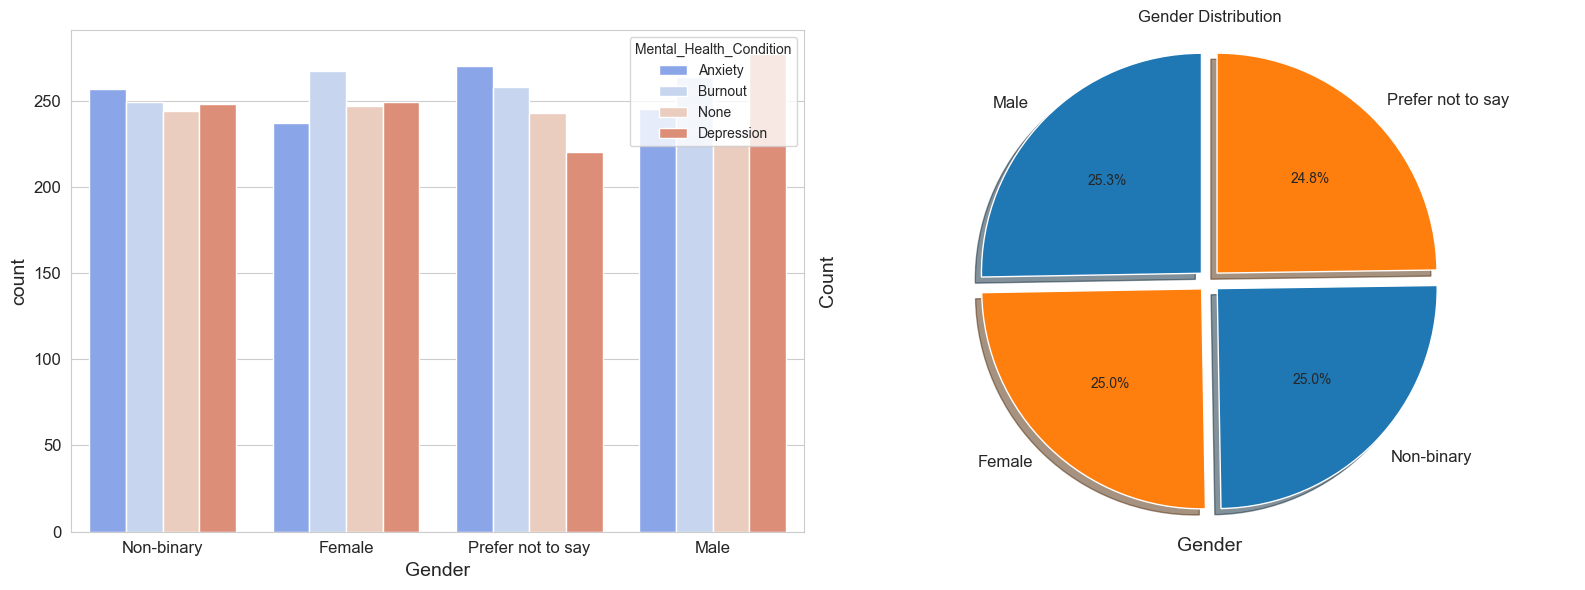

In [17]:
# Count plot and pie chart for Gender
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Count plot
plot_countplot(train_set, x_col='Gender', hue_col='Mental_Health_Condition', title='Mental Health by Gender', ax=axes[0])

# Pie chart 
plot_piechart(train_set, column='Gender', title='Gender Distribution', colors=['#1f77b4', '#ff7f0e'], ax=axes[1])

plt.tight_layout()
plt.show()

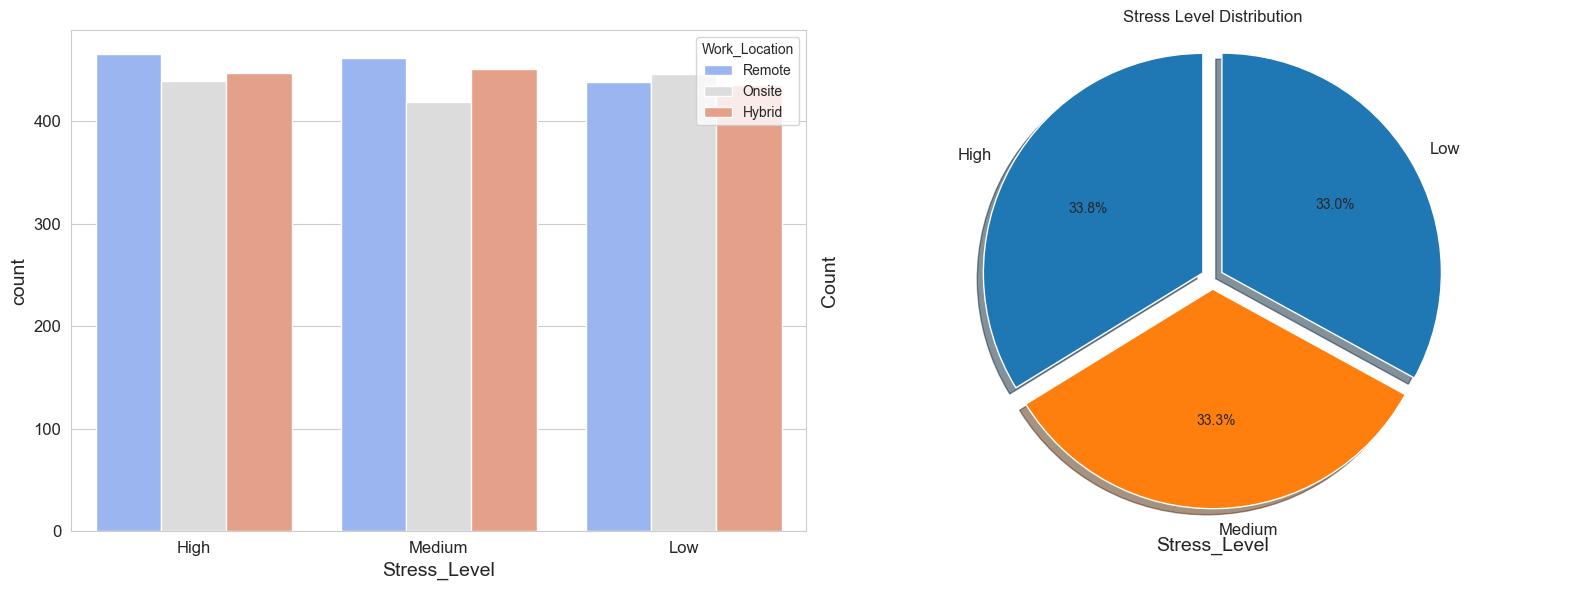

In [33]:
# Count plot and pie chart for Gender
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Count plot
plot_countplot(train_set, x_col='Stress_Level', hue_col='Work_Location', title='Mental Health by Stress Level', ax=axes[0])

# Pie chart 
plot_piechart(train_set, column='Stress_Level', title='Stress Level Distribution', colors=['#1f77b4', '#ff7f0e'], ax=axes[1])

plt.tight_layout()
plt.show()

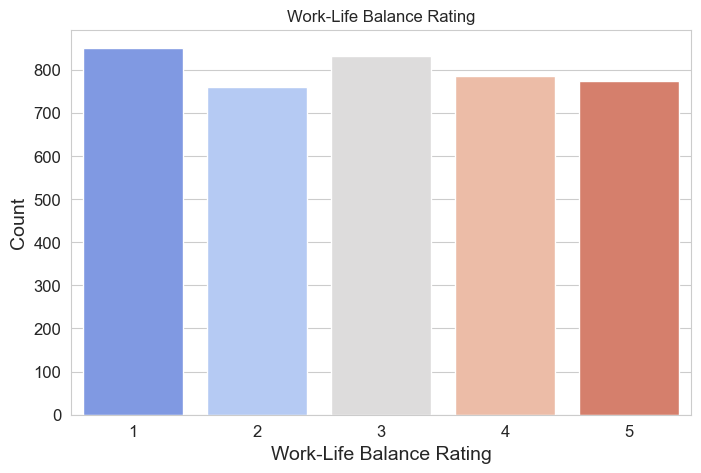

In [19]:
# Countplot for Work-Life Balance Rating
plt.figure(figsize=(8, 5))
sns.countplot(data=train_set, x='Work_Life_Balance_Rating', palette='coolwarm')
plt.title('Work-Life Balance Rating')
plt.xlabel('Work-Life Balance Rating')
plt.ylabel('Count')
plt.show()

In [20]:
def clean_data(df):
    # Transforming Physical_Activity column
    df['Physical_Activity'] = df['Physical_Activity'].apply(lambda x: 'Yes' if x in ['Daily', 'Weekly'] else 'No')
    
    # Grouping Mental_Health_Condition values
    df['Mental_Health_Condition'] = df['Mental_Health_Condition'].apply(lambda x: 'Yes' if x in ['Depression', 'Anxiety', 'Burnout'] else 'No')
    
    return df

# Apply the cleaning function
train_copy = clean_data(train_set)

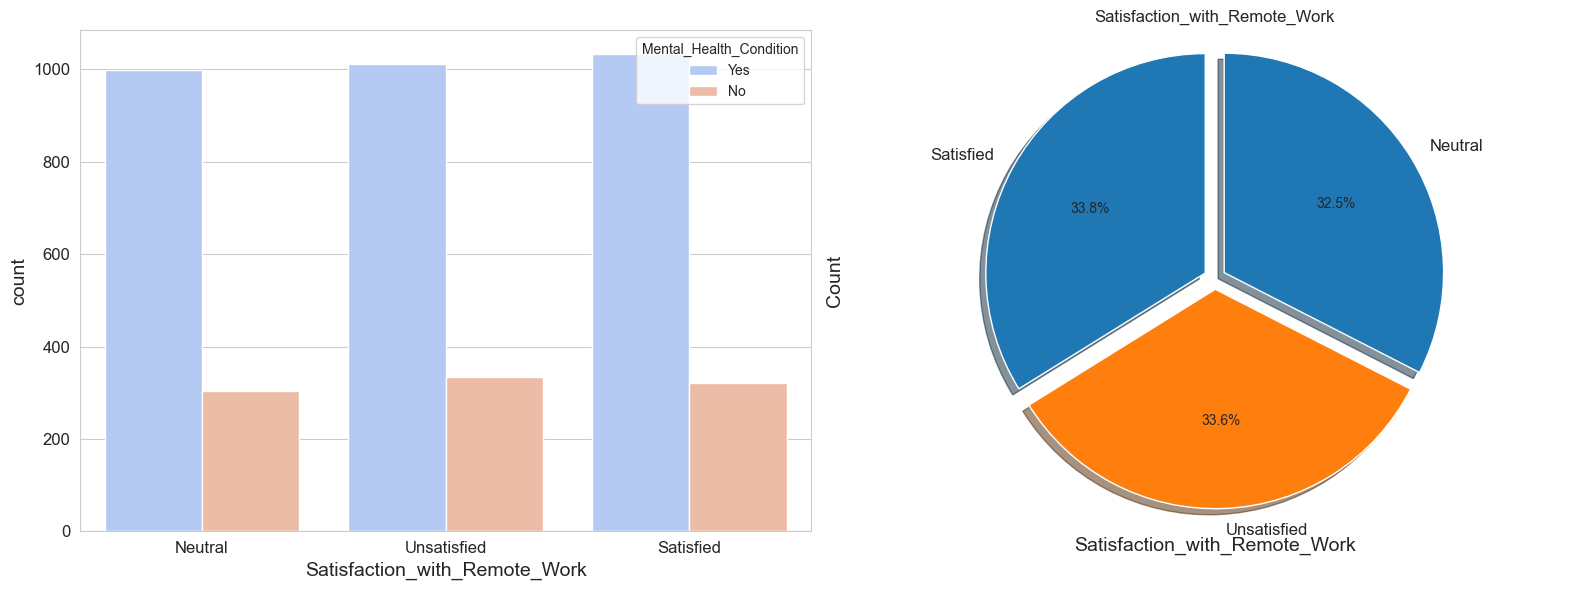

In [21]:
# Count plot and pie chart for Gender
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Count plot
plot_countplot(train_copy, x_col='Satisfaction_with_Remote_Work', hue_col='Mental_Health_Condition', title='Mental Health by Gender', ax=axes[0])

# Pie chart 
plot_piechart(train_copy, column='Satisfaction_with_Remote_Work', title='Satisfaction_with_Remote_Work', colors=['#1f77b4', '#ff7f0e'], ax=axes[1])

plt.tight_layout()
plt.show()

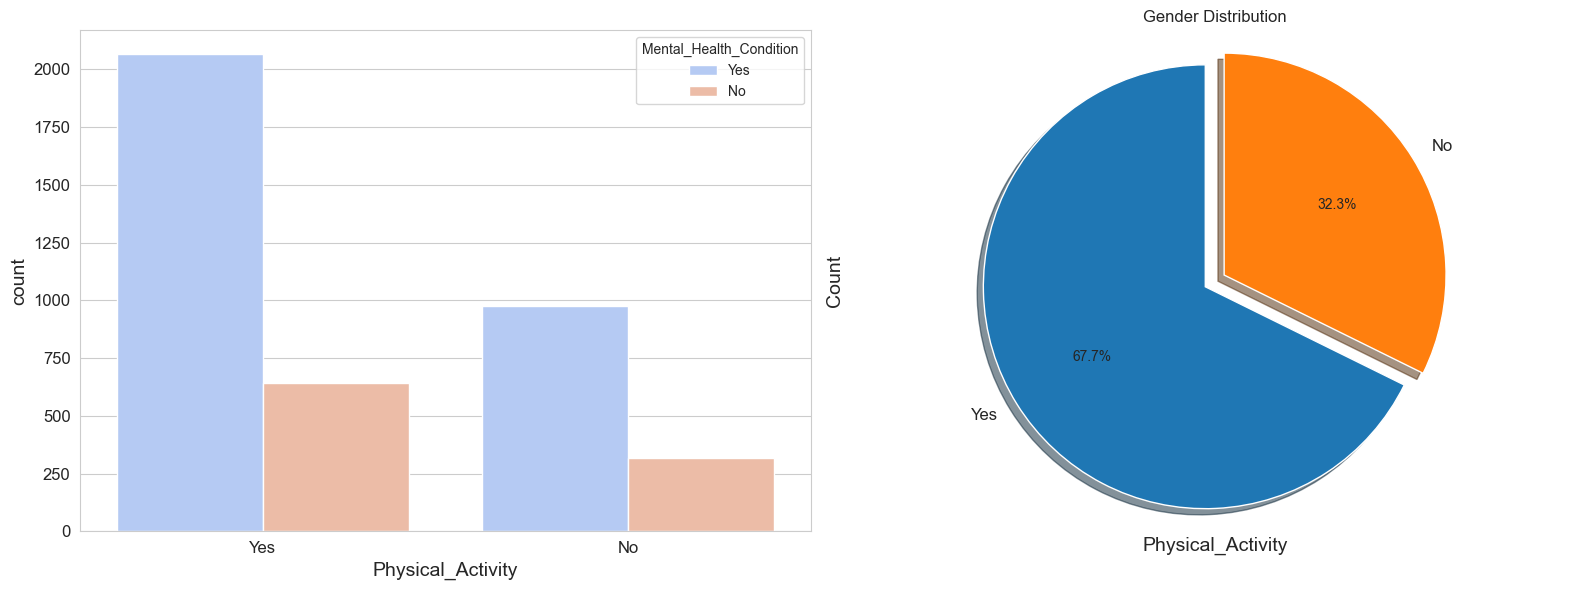

In [22]:
# Count plot and pie chart for Gender
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Count plot
plot_countplot(train_copy, x_col='Physical_Activity', hue_col='Mental_Health_Condition', title='Mental Health by Gender', ax=axes[0])

# Pie chart 
plot_piechart(train_copy, column='Physical_Activity', title='Gender Distribution', colors=['#1f77b4', '#ff7f0e'], ax=axes[1])

plt.tight_layout()
plt.show()

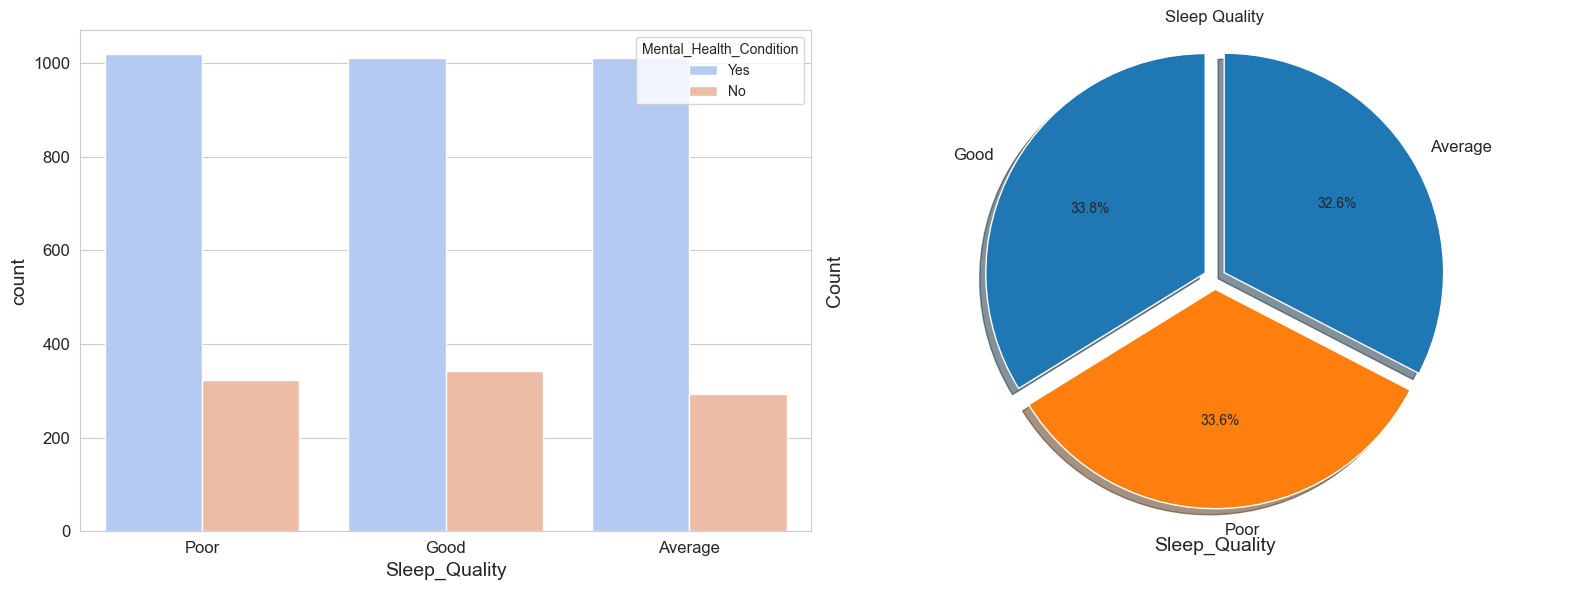

In [23]:
# Count plot and pie chart for Gender
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Count plot
plot_countplot(train_copy, x_col='Sleep_Quality', hue_col='Mental_Health_Condition', title='Mental Health by Gender', ax=axes[0])

# Pie chart 
plot_piechart(train_copy, column='Sleep_Quality', title='Sleep Quality', colors=['#1f77b4', '#ff7f0e'], ax=axes[1])

plt.tight_layout()
plt.show()

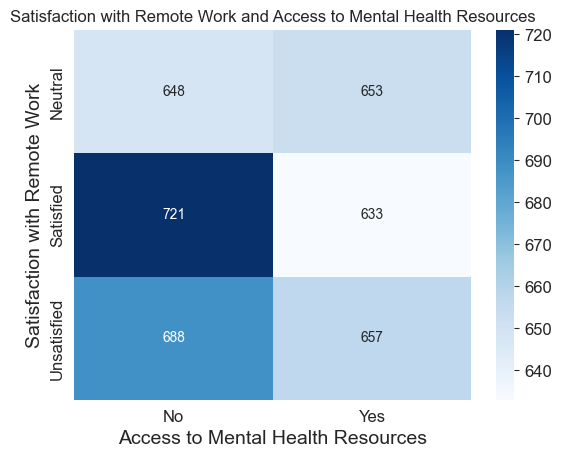

In [24]:
# Create a crosstab for satisfaction vs access to mental health resources
heatmap_data = pd.crosstab(train_copy['Satisfaction_with_Remote_Work'], train_copy['Access_to_Mental_Health_Resources'])

# Create a heatmap
sns.heatmap(heatmap_data, annot=True, cmap='Blues', fmt="d")
plt.title('Satisfaction with Remote Work and Access to Mental Health Resources')
plt.xlabel('Access to Mental Health Resources')
plt.ylabel('Satisfaction with Remote Work')

plt.show()


In [25]:
# Filter the dataset where Work_Location is 'Remote'
remote_workers = train_set[train_set['Work_Location'] == 'Remote']

In [26]:
remote_workers['Mental_Health_Condition'].unique()

array(['Yes', 'No'], dtype=object)

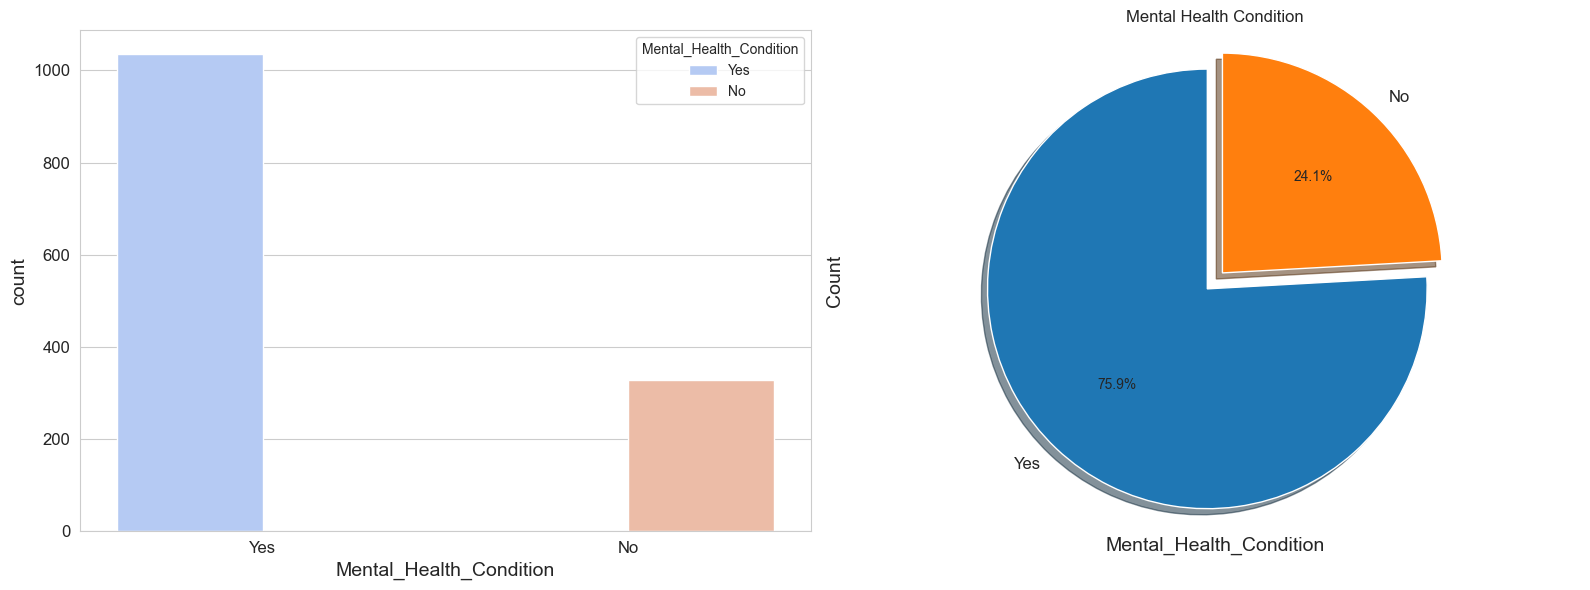

In [49]:
# Count plot and pie chart for Gender
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Count plot
plot_countplot(remote_workers, x_col='Mental_Health_Condition', hue_col='Mental_Health_Condition', title='Mental Health by Work Location', ax=axes[0])

plot_piechart(remote_workers, column='Mental_Health_Condition', title='Mental Health Condition', colors=['#1f77b4', '#ff7f0e'], ax=axes[1])
plt.tight_layout()
plt.show()

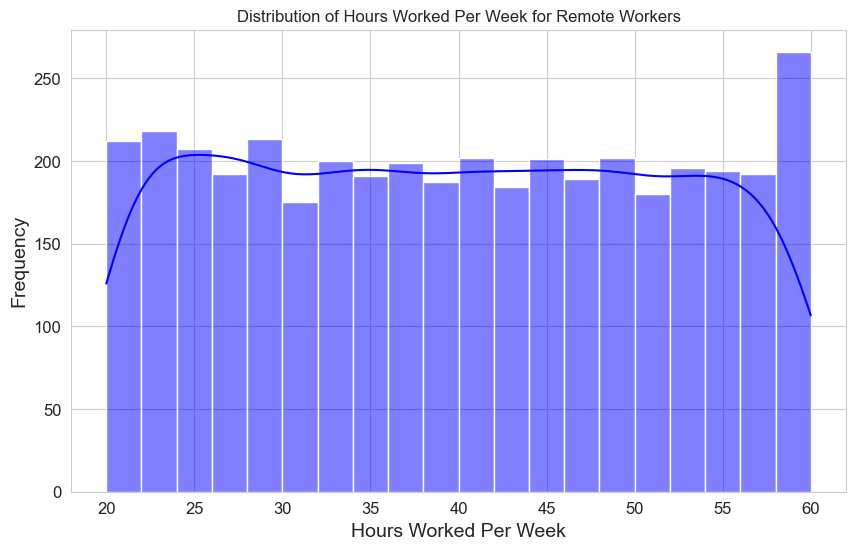

In [27]:
# Histogram for Hours Worked Per Week for Remote Workers
plt.figure(figsize=(10, 6))
sns.histplot(train_copy['Hours_Worked_Per_Week'], bins=20, kde=True, color='blue')

# Set labels and title
plt.title('Distribution of Hours Worked Per Week for Remote Workers')
plt.xlabel('Hours Worked Per Week')
plt.ylabel('Frequency')

# Show the plot
plt.show()


In [28]:
# Crosstab for Remote Workers only
crosstab_remote = pd.crosstab(remote_workers['Satisfaction_with_Remote_Work'], remote_workers['Mental_Health_Condition'])

# Display the crosstab
print(crosstab_remote)

Mental_Health_Condition         No  Yes
Satisfaction_with_Remote_Work          
Neutral                        105  364
Satisfied                       96  320
Unsatisfied                    128  351


c:\Users\nuhaa\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


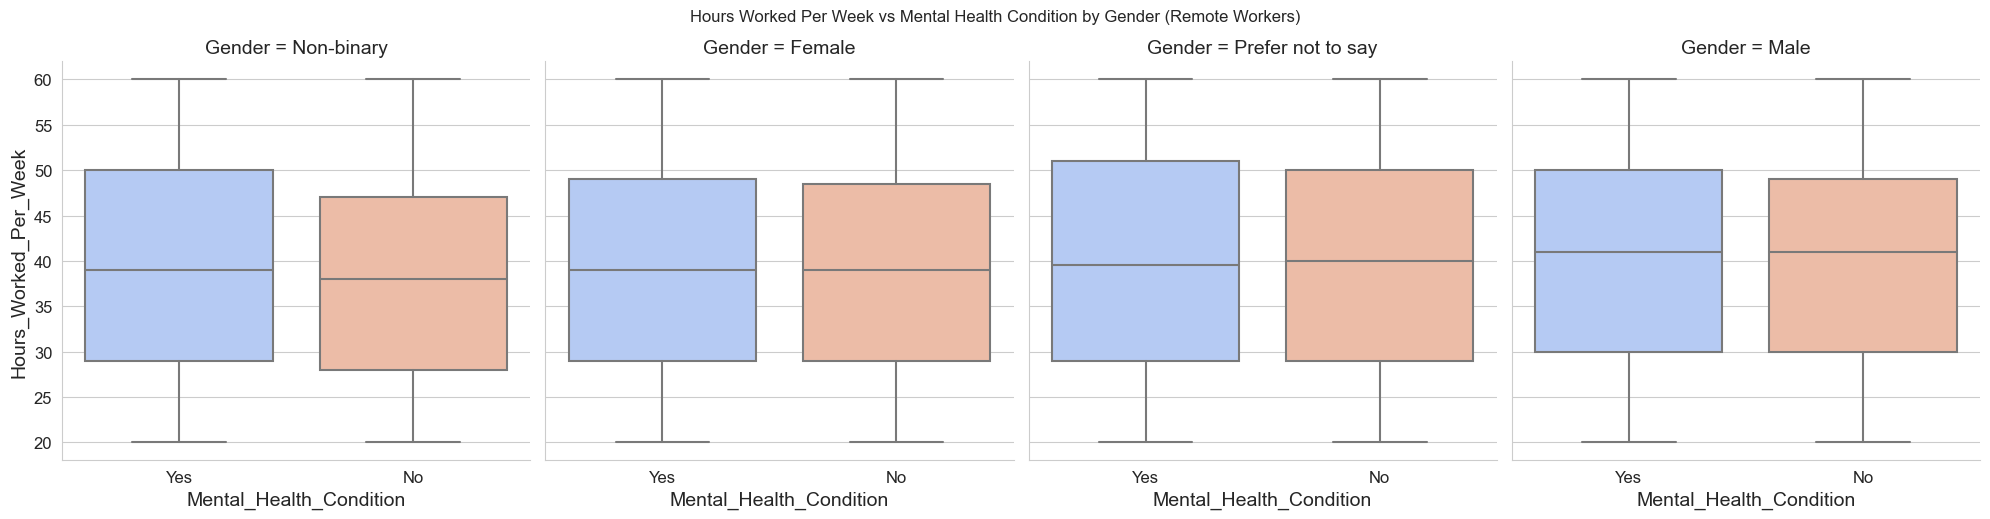

In [29]:
# Facet grid to compare Mental Health Condition and Hours Worked by Gender
g = sns.FacetGrid(train_copy, col='Gender', height=5, aspect=1)
g.map(sns.boxplot, 'Mental_Health_Condition', 'Hours_Worked_Per_Week', palette='coolwarm')

# Set overall title
g.fig.suptitle('Hours Worked Per Week vs Mental Health Condition by Gender (Remote Workers)', y=1.03)

# Display the plot
plt.show()

C:\Users\nuhaa\AppData\Local\Temp\ipykernel_25564\1890332588.py:3: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='Mental_Health_Condition', y='Hours_Worked_Per_Week', data=remote_workers, jitter=True, palette='coolwarm')


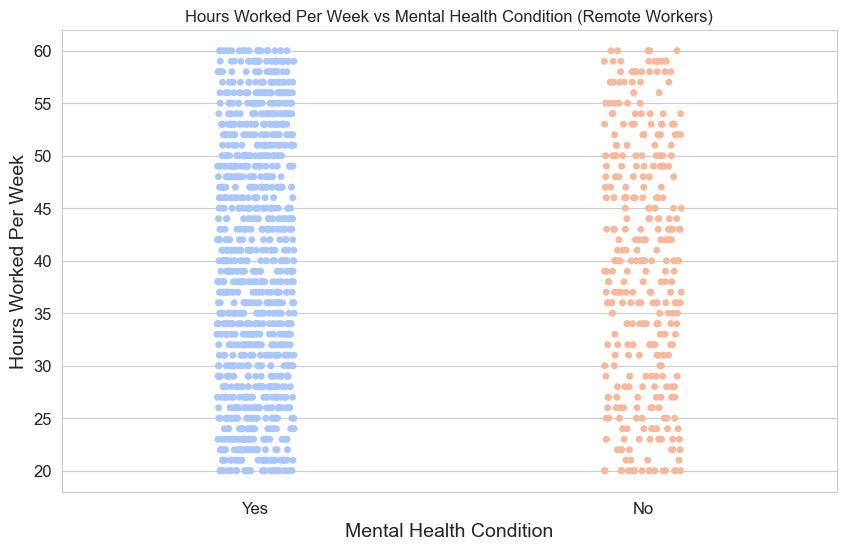

In [30]:
# Scatter plot to show individual points with jitter
plt.figure(figsize=(10, 6))
sns.stripplot(x='Mental_Health_Condition', y='Hours_Worked_Per_Week', data=remote_workers, jitter=True, palette='coolwarm')

# Set labels and title
plt.title('Hours Worked Per Week vs Mental Health Condition (Remote Workers)')
plt.xlabel('Mental Health Condition')
plt.ylabel('Hours Worked Per Week')

# Display the plot
plt.show()


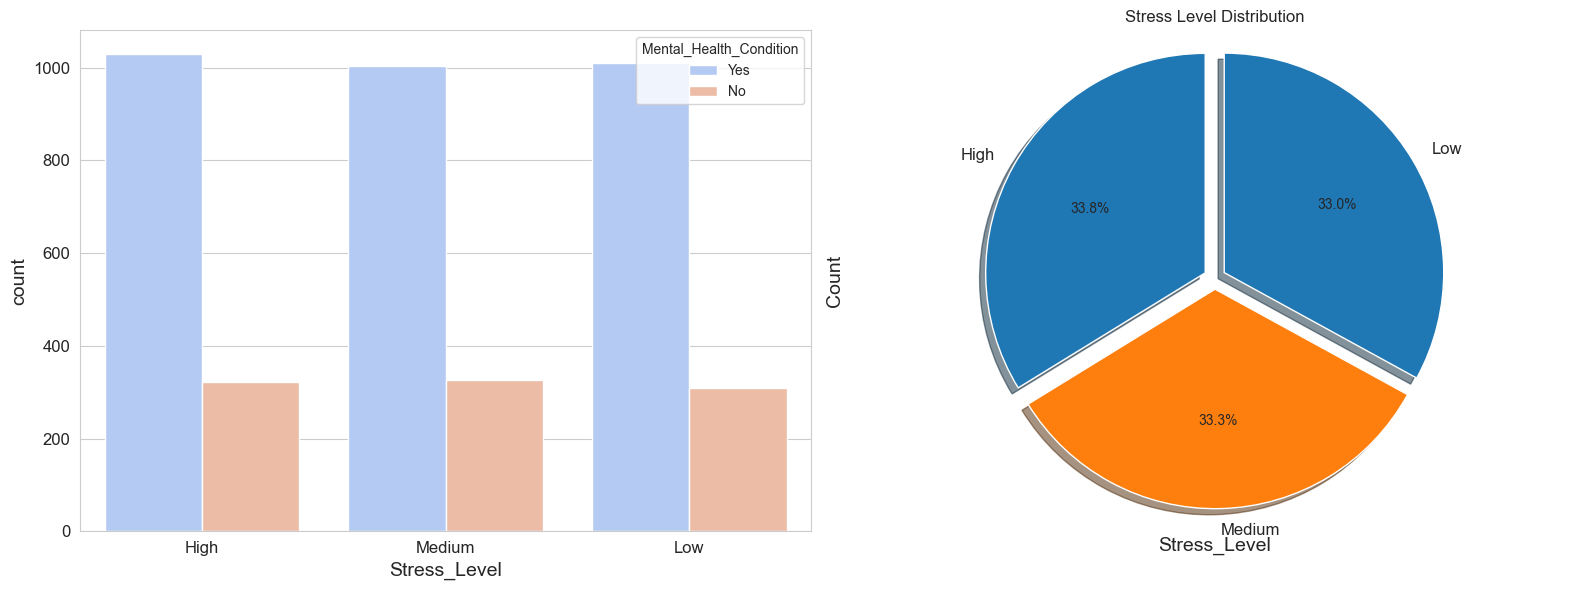

In [31]:
# Count plot and pie chart for Gender
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Count plot
plot_countplot(train_copy, x_col='Stress_Level', hue_col='Mental_Health_Condition', title='Mental Health by Stress Level', ax=axes[0])

# Pie chart 
plot_piechart(train_copy, column='Stress_Level', title='Stress Level Distribution', colors=['#1f77b4', '#ff7f0e'], ax=axes[1])

plt.tight_layout()
plt.show()

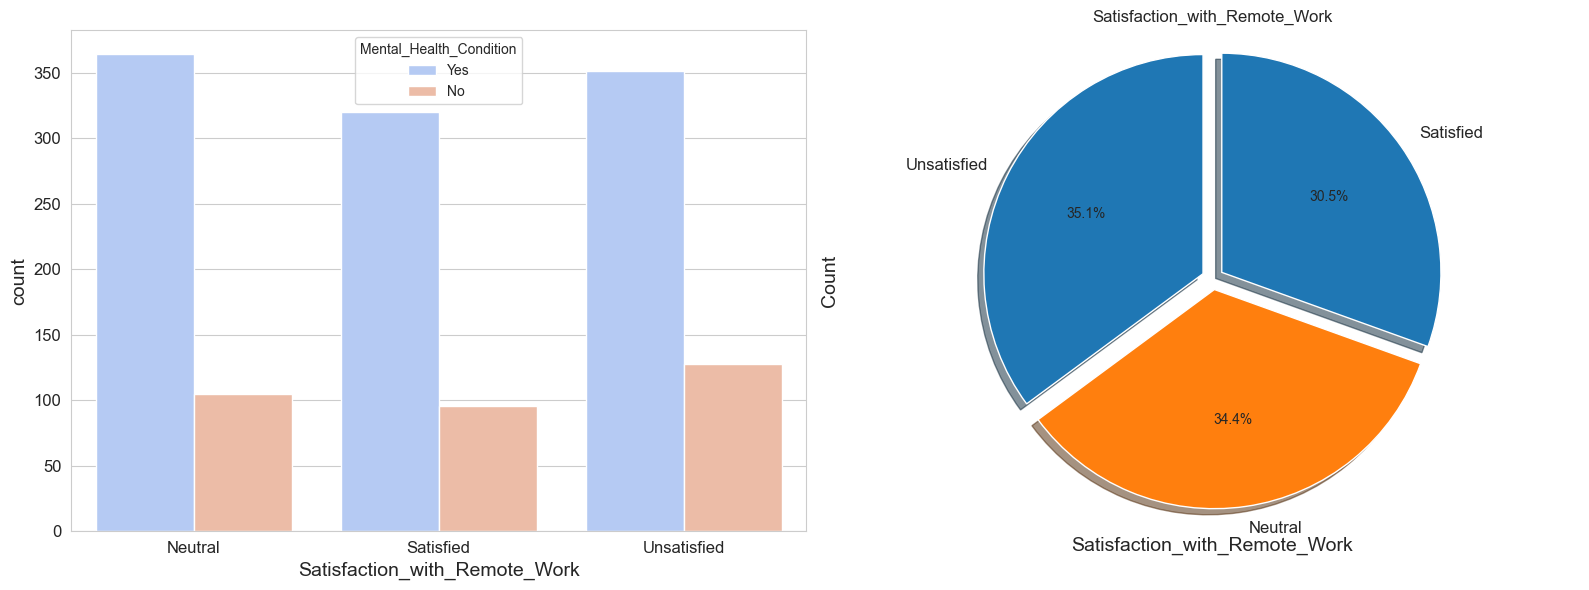

In [34]:
# Count plot and pie chart for Gender
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Count plot
plot_countplot(remote_workers, x_col='Satisfaction_with_Remote_Work', hue_col='Mental_Health_Condition', title='Mental Health by Gender', ax=axes[0])

# Pie chart 
plot_piechart(remote_workers, column='Satisfaction_with_Remote_Work', title='Satisfaction_with_Remote_Work', colors=['#1f77b4', '#ff7f0e'], ax=axes[1])

plt.tight_layout()
plt.show()

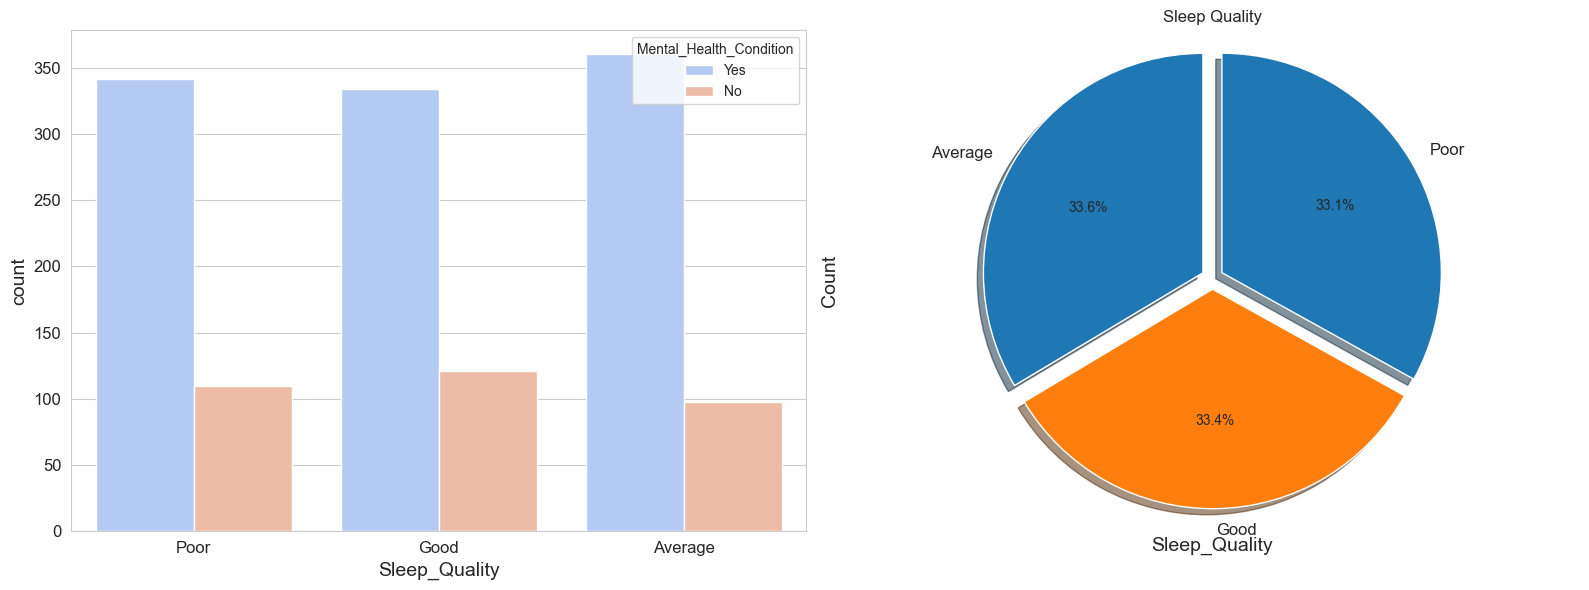

In [36]:
# Count plot and pie chart for Gender
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Count plot
plot_countplot(remote_workers, x_col='Sleep_Quality', hue_col='Mental_Health_Condition', title='Mental Health by Gender', ax=axes[0])

# Pie chart 
plot_piechart(remote_workers, column='Sleep_Quality', title='Sleep Quality', colors=['#1f77b4', '#ff7f0e'], ax=axes[1])

plt.tight_layout()
plt.show()

# Coclusion

* Employees range in age from 20 to 60, with the majority between 30 and 60 years old. Work arrangements are evenly split: 32% work remotely, 33% in hybrid roles, and 33% on-site. Regarding mental health, 25% of employees have no mental health condition, while the remaining 75% are equally distributed among burnout, depression, and anxiety (each at 25%).

* Remote workers tend to have higher rates of depression, while on-site workers are more likely to experience burnout. Gender representation is balanced across the workforce, including male, female, non-binary, and those who prefer not to disclose. Male employees show the highest rate of depression, while female employees are more prone to burnout.

* Most employees rate their work-life balance as 1 (on a scale), indicating dissatisfaction. Among remote workers, 76% have a mental health condition, with depression, anxiety, and burnout being prevalent. Additionally, 67% of remote workers report medium to high stress levels, often working longer hours compared to those without mental health issues.

* More than 65% of remote workers with mental health conditions express dissatisfaction or neutrality towards remote work. Sleep quality is another concern, with only 33% of remote workers reporting good sleep, while the rest experience average to poor sleep quality. Lastly, 68% of remote workers engage in physical activity, yet they still experience mental health challenges.
